In [1]:
import pandas as pd
import matplotlib.pyplot as plt
data = pd.read_csv(r"C:\Users\Usuario1\Downloads\0b54e719-85c2-44ab-bbb2-9fe4372f4a45_final.log",sep = ";")


ParserError: Error tokenizing data. C error: Expected 1 fields in line 50006, saw 17


In [2]:
import json
import io
def _process_data_(file):
    with open(file, 'r') as file:
        log_content = file.read()
    sections = log_content.split('Sandbox logs:')[1].split('Activities log:')
    sandbox_log =  sections[0].strip()
    activities_log = sections[1].split('Trade History:')[0]
    # sandbox_log_list = [json.loads(line) for line in sandbox_log.split('\n')]
    trade_history =  json.loads(sections[1].split('Trade History:')[1])
    # sandbox_log_df = pd.DataFrame(sandbox_log_list)
    market_data_df = pd.read_csv(io.StringIO(activities_log), sep=";", header=0)
    trade_history_df = pd.json_normalize(trade_history)
    return market_data_df, trade_history_df

In [3]:
data,data_2 = _process_data_(r"C:\Users\Usuario1\Downloads\0b54e719-85c2-44ab-bbb2-9fe4372f4a45_final.log")

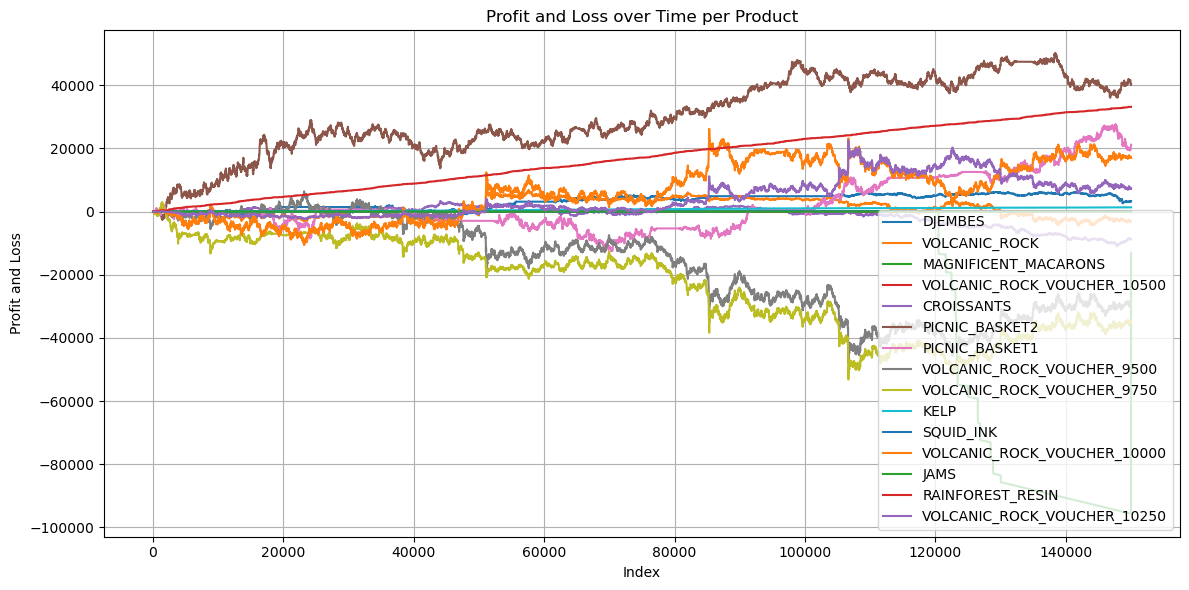

In [4]:
plt.figure(figsize=(12,6))
for prod in data["product"].unique():
    filtered = data[data["product"] == prod]
    plt.plot(filtered["profit_and_loss"], label=prod)
plt.xlabel("Index")
plt.ylabel("Profit and Loss")
plt.title("Profit and Loss over Time per Product")
plt.legend()
plt.grid(True)
plt.tight_layout()


In [ ]:
ices2 = pd.read_csv(r"C:\Users\Usuario1\Desktop\quant\IMC_Prosperity\Round5\Miquel\round-5-island-data-bottle\prices_round_5_day_2.csv", sep = ";")
prices3 = pd.read_csv(r"C:\Users\Usuario1\Desktop\quant\IMC_Prosperity\Round5\Miquel\round-5-island-data-bottle\prices_round_5_day_3.csv", sep = ";")
prices4 = pd.read_csv(r"C:\Users\Usuario1\Desktop\quant\IMC_Prosperity\Round5\Miquel\round-5-island-data-bottle\prices_round_5_day_4.csv", sep = ";")
trades2 = pd.read_csv(r"C:\Users\Usuario1\Desktop\quant\IMC_Prosperity\Round5\Miquel\round-5-island-data-bottle\trades_round_5_day_2.csv",sep = ";")
trades3 = pd.read_csv(r"C:\Users\Usuario1\Desktop\quant\IMC_Prosperity\Round5\Miquel\round-5-island-data-bottle\trades_round_5_day_3.csv",sep = ";")
trades4 = pd.read_csv(r"C:\Users\Usuario1\Desktop\quant\IMC_Prosperity\Round5\Miquel\round-5-island-data-bottle\trades_round_5_day_4.csv",sep = ";")
prices2["day"] = 2
prices3["day"] = 3
prices4["day"] = 4
prices = pd.concat([prices2,prices3,prices4],ignore_index=True)
prices.reset_index(inplace = True)
trades2["day"] = 2
trades3["day"] = 3
trades4["day"] = 4
trades = pd.concat([trades2,trades3,trades4],ignore_index=True)
trades.reset_index(inplace = True)
prices.loc[prices["day"] == 3, "timestamp"] += 1000000
prices.loc[prices["day"] == 4, "timestamp"] += 2000000
trades.loc[trades["day"] == 3, "timestamp"] += 1000000
trades.loc[trades["day"] == 4, "timestamp"] += 2000000


In [9]:
traders = trades["buyer"].unique()
products = trades["symbol"].unique()

In [10]:
traders

array(['Caesar', 'Charlie', 'Paris', 'Camilla', 'Pablo', 'Penelope',
       'Gary', 'Peter', 'Gina', 'Olivia'], dtype=object)

In [11]:
products

array(['CROISSANTS', 'RAINFOREST_RESIN', 'JAMS', 'KELP', 'SQUID_INK',
       'PICNIC_BASKET1', 'PICNIC_BASKET2', 'MAGNIFICENT_MACARONS',
       'DJEMBES', 'VOLCANIC_ROCK_VOUCHER_10000',
       'VOLCANIC_ROCK_VOUCHER_10250', 'VOLCANIC_ROCK_VOUCHER_10500',
       'VOLCANIC_ROCK_VOUCHER_9500', 'VOLCANIC_ROCK_VOUCHER_9750',
       'VOLCANIC_ROCK'], dtype=object)

In [12]:
trades

,index,timestamp,buyer,seller,symbol,currency,price,quantity,day
0,0,0,Caesar,Paris,CROISSANTS,SEASHELLS,4265.0,8,2
1,1,100,Charlie,Paris,RAINFOREST_RESIN,SEASHELLS,9999.0,1,2
2,2,200,Paris,Caesar,CROISSANTS,SEASHELLS,4266.0,8,2
3,3,200,Paris,Caesar,JAMS,SEASHELLS,6520.0,7,2
4,4,200,Paris,Charlie,KELP,SEASHELLS,2046.0,1,2
...,...,...,...,...,...,...,...,...,...
53472,53472,2999600,Caesar,Pablo,VOLCANIC_ROCK,SEASHELLS,10104.0,2,4
53473,53473,2999700,Charlie,Paris,KELP,SEASHELLS,2011.0,1,4
53474,53474,2999700,Charlie,Paris,SQUID_INK,SEASHELLS,1899.0,1,4
53475,53475,2999700,Peter,Caesar,VOLCANIC_ROCK,SEASHELLS,10107.0,10,4


In [13]:
mm_products = {}
mt_products = {}
for trader in traders:
    mm_products[trader] = []  # initialize list for trader
    mt_products[trader] = []  # initialize list for trader
    filter1 = trades[trades["buyer"] == trader]
    filter2 = trades[trades["seller"] == trader]
    for product in products:
        buy_lengths = filter1[filter1["symbol"] == product]["quantity"].sum()
        sell_lengths = filter2[filter2["symbol"] == product]["quantity"].sum()
        print(f"{trader} has executed {buy_lengths} buys and {sell_lengths} sells for product {product}")
        if (buy_lengths + sell_lengths) > 0 and (abs(buy_lengths - sell_lengths) * 2 / (buy_lengths + sell_lengths)) < 0.1:
            mm_products[trader].append(product)
        elif (buy_lengths+sell_lengths)>0 and not  (abs(buy_lengths - sell_lengths) * 2 / (buy_lengths + sell_lengths)) < 0.1:
            mt_products[trader].append(product)



Caesar has executed 12299 buys and 7039 sells for product CROISSANTS
Caesar has executed 675 buys and 672 sells for product RAINFOREST_RESIN
Caesar has executed 16280 buys and 8439 sells for product JAMS
Caesar has executed 587 buys and 1393 sells for product KELP
Caesar has executed 598 buys and 1408 sells for product SQUID_INK
Caesar has executed 883 buys and 660 sells for product PICNIC_BASKET1
Caesar has executed 523 buys and 540 sells for product PICNIC_BASKET2
Caesar has executed 1992 buys and 101 sells for product MAGNIFICENT_MACARONS
Caesar has executed 6408 buys and 4224 sells for product DJEMBES
Caesar has executed 952 buys and 21786 sells for product VOLCANIC_ROCK_VOUCHER_10000
Caesar has executed 866 buys and 20204 sells for product VOLCANIC_ROCK_VOUCHER_10250
Caesar has executed 826 buys and 12493 sells for product VOLCANIC_ROCK_VOUCHER_10500
Caesar has executed 1026 buys and 20960 sells for product VOLCANIC_ROCK_VOUCHER_9500
Caesar has executed 1010 buys and 21627 sells f

In [14]:
mm_products

{'Caesar': ['RAINFOREST_RESIN', 'PICNIC_BASKET2', 'VOLCANIC_ROCK'],
 'Charlie': ['RAINFOREST_RESIN'],
 'Paris': ['CROISSANTS',
  'RAINFOREST_RESIN',
  'JAMS',
  'MAGNIFICENT_MACARONS',
  'DJEMBES'],
 'Camilla': ['RAINFOREST_RESIN', 'MAGNIFICENT_MACARONS'],
 'Pablo': ['RAINFOREST_RESIN', 'VOLCANIC_ROCK'],
 'Penelope': ['RAINFOREST_RESIN',
  'KELP',
  'SQUID_INK',
  'PICNIC_BASKET1',
  'PICNIC_BASKET2',
  'VOLCANIC_ROCK_VOUCHER_9500',
  'VOLCANIC_ROCK_VOUCHER_9750'],
 'Gary': ['RAINFOREST_RESIN', 'KELP', 'SQUID_INK'],
 'Peter': [],
 'Gina': [],
 'Olivia': ['CROISSANTS', 'KELP', 'SQUID_INK']}

In [101]:
pablo = trades[(trades["buyer"] == "Pablo") | (trades["seller"] == "Pablo")]
pablo_picnic1 = pablo[pablo["symbol"] == "PICNIC_BASKET1"]

In [102]:
run = False
if run:
    for product in trades["symbol"].unique():
        for trader in trades["buyer"].unique():
            bids = trades[(trades["symbol"] == product) & (trades["buyer"] == trader)]
            asks = trades[(trades["symbol"] == product) & (trades["seller"] == trader)]
            # Skip if no data for both bids and asks
            if bids.empty and asks.empty:
                continue

            fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
            
            if not bids.empty:
                ax1.hist(bids["price"], bins=50, alpha=0.7, color="blue", label="Bids")
                ax1.set_xlabel("Price")
                ax1.set_ylabel("Frequency")
                ax1.set_title("Bids")
                ax1.legend()
            else:
                ax1.text(0.5, 0.5, "No Bids", ha="center", va="center", fontsize=12)
                ax1.set_axis_off()
                
            if not asks.empty:
                ax2.hist(asks["price"], bins=50, alpha=0.7, color="orange", label="Asks")
                ax2.set_xlabel("Price")
                ax2.set_ylabel("Frequency")
                ax2.set_title("Asks")
                ax2.legend()
            else:
                ax2.text(0.5, 0.5, "No Asks", ha="center", va="center", fontsize=12)
                ax2.set_axis_off()
                
            fig.suptitle(f"Histogram of Bids and Asks for {product} by {trader}", fontsize=14)
            plt.tight_layout(rect=[0, 0, 1, 0.93])
            plt.savefig(rf"bids_asks_traders\bids_asks_{product}_{trader}.png")
            plt.close()

In [103]:
pablo

,index,timestamp,buyer,seller,symbol,currency,price,quantity,day
13,13,900,Charlie,Pablo,RAINFOREST_RESIN,SEASHELLS,9998.0,4,2
19,19,1300,Pablo,Camilla,PICNIC_BASKET1,SEASHELLS,58732.0,6,2
20,20,1300,Pablo,Camilla,PICNIC_BASKET2,SEASHELLS,30114.0,6,2
48,48,3700,Charlie,Pablo,KELP,SEASHELLS,2044.0,5,2
49,49,3700,Charlie,Pablo,SQUID_INK,SEASHELLS,1807.0,5,2
...,...,...,...,...,...,...,...,...,...
53409,53409,2996100,Pablo,Camilla,SQUID_INK,SEASHELLS,1919.0,1,4
53432,53432,2998300,Pablo,Caesar,PICNIC_BASKET1,SEASHELLS,58424.0,1,4
53437,53437,2998300,Camilla,Pablo,VOLCANIC_ROCK_VOUCHER_10500,SEASHELLS,0.0,11,4
53438,53438,2998300,Camilla,Pablo,VOLCANIC_ROCK_VOUCHER_9500,SEASHELLS,604.0,11,4


Camilla makes a lot of money I believe market making squid ink, can we try to follow his strat and figure out what his fair price at each point is?


In [104]:
camilla = trades[(trades["buyer"]=="Camilla") | (trades["seller"]=="Camilla")]
camilla_squid = camilla[camilla["symbol"]=="SQUID_INK"]

In [111]:
import plotly.graph_objects as go
bids_camilla_squid = camilla_squid[camilla_squid["buyer"]=="Camilla"]

asks_camilla_squid = camilla_squid[camilla_squid["seller"] == "Camilla"]
squid_market = prices[prices["product"]=="SQUID_INK"]
squid_market["mid"] = (squid_market["ask_price_1"] + squid_market["bid_price_1"]) /2
fig = go.Figure()
fig.add_trace(go.Scatter(
    y=bids_camilla_squid["price"],
    x = bids_camilla_squid["timestamp"],
    mode='markers',
    name='bids'
))
fig.add_trace(go.Scatter(
    y=asks_camilla_squid["price"],
    x = asks_camilla_squid["timestamp"],
    mode='markers',
    name='asks'
))
fig.add_trace(go.Scatter(
    y = squid_market["mid"][::10],
    x = squid_market["timestamp"][::10],
    mode = "markers",
    name = "mid_market"
))
fig.update_layout(
    title="Interactive Plot for Camilla SQUID_INK Prices",
    xaxis_title="Index",
    yaxis_title="Price"
)
fig.show()

C:\Users\Usuario1\AppData\Local\Temp\ipykernel_6900\935731550.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [112]:
camilla_squid

,index,timestamp,buyer,seller,symbol,currency,price,quantity,day
18,18,1200,Camilla,Paris,SQUID_INK,SEASHELLS,1804.0,1,2
28,28,2000,Charlie,Camilla,SQUID_INK,SEASHELLS,1806.0,1,2
36,36,3200,Paris,Camilla,SQUID_INK,SEASHELLS,1807.0,2,2
37,37,3500,Charlie,Camilla,SQUID_INK,SEASHELLS,1807.0,1,2
154,154,10500,Camilla,Paris,SQUID_INK,SEASHELLS,1803.0,2,2
...,...,...,...,...,...,...,...,...,...
53395,53395,2995300,Paris,Camilla,SQUID_INK,SEASHELLS,1921.0,1,4
53400,53400,2995900,Paris,Camilla,SQUID_INK,SEASHELLS,1919.0,1,4
53403,53403,2996000,Camilla,Gary,SQUID_INK,SEASHELLS,1917.0,2,4
53409,53409,2996100,Pablo,Camilla,SQUID_INK,SEASHELLS,1919.0,1,4


,index,timestamp,buyer,seller,symbol,currency,price,quantity,day
18,18,1200,Camilla,Paris,SQUID_INK,SEASHELLS,1804.0,1,2
28,28,2000,Charlie,Camilla,SQUID_INK,SEASHELLS,1806.0,1,2
36,36,3200,Paris,Camilla,SQUID_INK,SEASHELLS,1807.0,2,2
37,37,3500,Charlie,Camilla,SQUID_INK,SEASHELLS,1807.0,1,2
154,154,10500,Camilla,Paris,SQUID_INK,SEASHELLS,1803.0,2,2
...,...,...,...,...,...,...,...,...,...
53395,53395,2995300,Paris,Camilla,SQUID_INK,SEASHELLS,1921.0,1,4
53400,53400,2995900,Paris,Camilla,SQUID_INK,SEASHELLS,1919.0,1,4
53403,53403,2996000,Camilla,Gary,SQUID_INK,SEASHELLS,1917.0,2,4
53409,53409,2996100,Pablo,Camilla,SQUID_INK,SEASHELLS,1919.0,1,4


### Re-research for baskets?
- Who follows who?

In [120]:
croissants = prices[prices["product"] == "CROISSANTS"]
jams = prices[prices["product"] == "JAMS"]
djembes = prices[prices["product"] == "DJEMBES"]
picnic_basket1 = prices[prices["product"] == "PICNIC_BASKET1"]
picnic_basket2 = prices[prices["product"] == "PICNIC_BASKET2"]

# Align by day and timestamp
aligned_data = pd.merge(
    croissants[["day", "timestamp", "bid_price_1"]],
    jams[["day", "timestamp", "bid_price_1"]],
    on=["day", "timestamp"],
    suffixes=("_croissants", "_jams")
)

# Rename the bid_price_1 column for djembes to avoid suffix conflicts
djembes = djembes.rename(columns={"bid_price_1": "bid_price_1_djembes"})

aligned_data = pd.merge(
    aligned_data,
    djembes[["day", "timestamp", "bid_price_1_djembes"]],
    on=["day", "timestamp"],
    how="left"
)
aligned_data["synthetic_basket_1"] = (
    6 * aligned_data["bid_price_1_croissants"] +
    3 * aligned_data["bid_price_1_jams"] +
    1 * aligned_data["bid_price_1_djembes"]
)

aligned_data["synthetic_basket_2"] = (
    4 * aligned_data["bid_price_1_croissants"] +
    2 * aligned_data["bid_price_1_jams"]
)
# Merge PICNIC_BASKET1 prices as "real_basket_1"
aligned_data = pd.merge(
    aligned_data,
    picnic_basket1[["day", "timestamp", "bid_price_1"]].rename(columns={"bid_price_1": "real_basket_1"}),
    on=["day", "timestamp"],
    how="left"
)

# Merge PICNIC_BASKET2 prices as "real_basket_2"
aligned_data = pd.merge(
    aligned_data,
    picnic_basket2[["day", "timestamp", "bid_price_1"]].rename(columns={"bid_price_1": "real_basket_2"}),
    on=["day", "timestamp"],
    how="left"
)

In [135]:
X_components = aligned_data[["bid_price_1_croissants", "bid_price_1_jams", "bid_price_1_djembes"]]
y_basket1 = aligned_data["real_basket_1"]
y_basket2 = aligned_data["real_basket_2"]

In [136]:
from sklearn.linear_model import LinearRegression
# Fit regression for Basket 1 with no intercept
model_basket1_components = LinearRegression(fit_intercept=False)
model_basket1_components.fit(X_components, y_basket1)
coefficients_basket1_components = model_basket1_components.coef_

# Fit regression for Basket 2 with no intercept
model_basket2_components = LinearRegression(fit_intercept=False)
model_basket2_components.fit(X_components, y_basket2)
coefficients_basket2_components = model_basket2_components.coef_

# Print results
print("Basket 1 Regression Coefficients (Components, No Intercept):", coefficients_basket1_components)
print("Basket 2 Regression Coefficients (Components, No Intercept):", coefficients_basket2_components)


Basket 1 Regression Coefficients (Components, No Intercept): [3.12507588 3.53763611 1.6550188 ]
Basket 2 Regression Coefficients (Components, No Intercept): [ 4.65355632  2.20941849 -0.30492813]


In [137]:
aligned_data["predicted_basket1"] = model_basket1_components.predict(X_components)
aligned_data["predicted_basket2"] = model_basket2_components.predict(X_components)

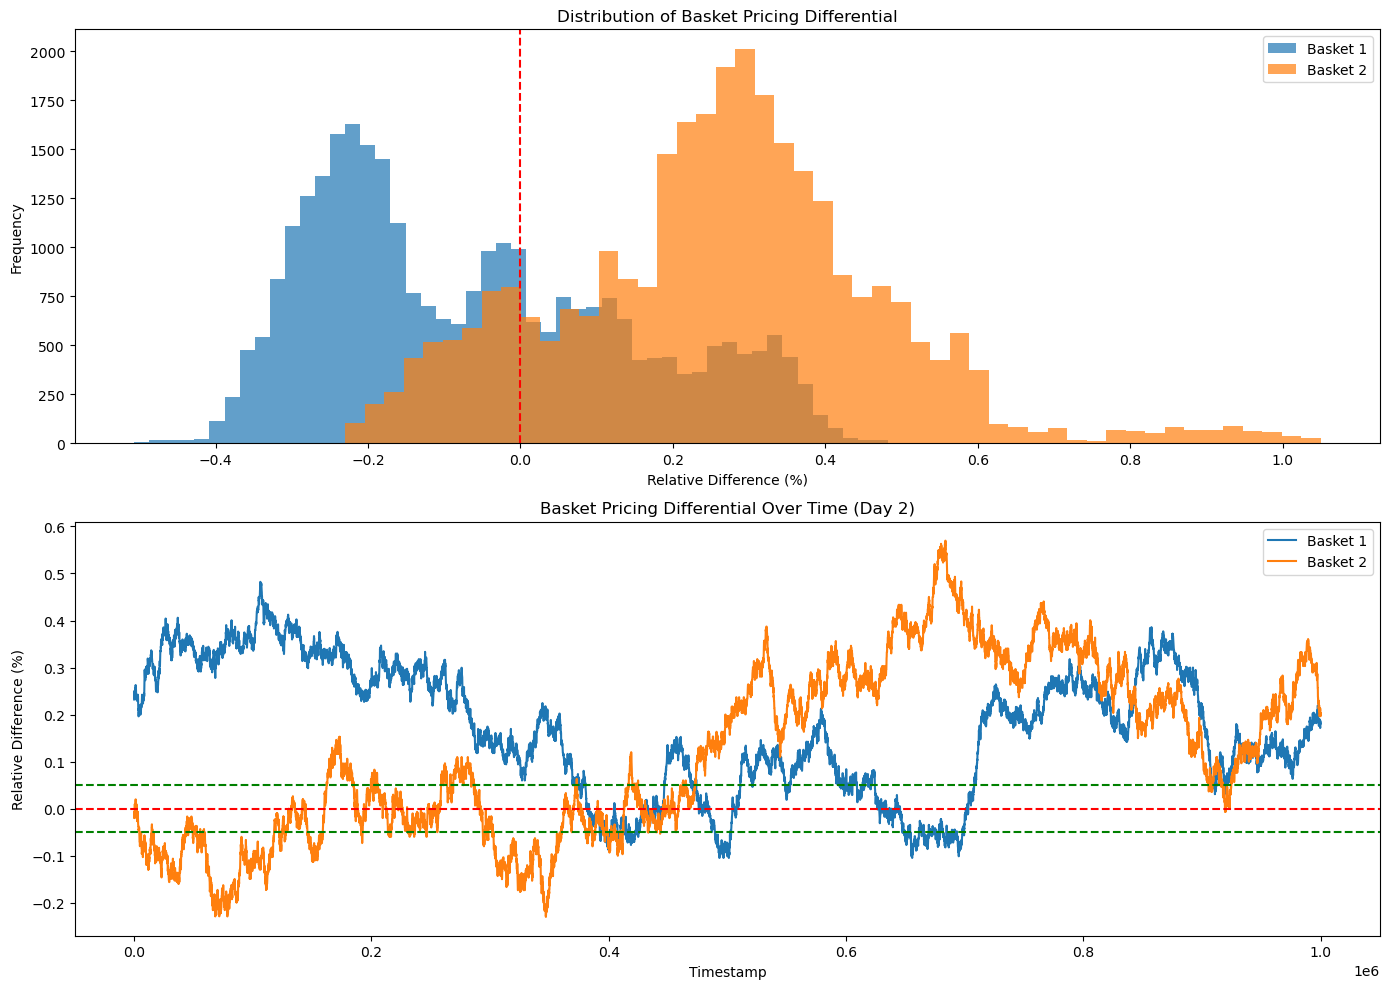

Correlation between basket mispricing and future returns:
component  croissant_basket1  croissant_basket2  djembes_basket1  \
lag                                                                
1                      0.002              0.004           -0.005   
3                     -0.004             -0.001           -0.009   
5                     -0.008             -0.004           -0.012   
10                    -0.014             -0.010           -0.017   
20                    -0.022             -0.018           -0.023   

component  jams_basket1  jams_basket2  
lag                                    
1                 0.003         0.009  
3                 0.003         0.013  
5                 0.003         0.016  
10                0.004         0.021  
20                0.005         0.030  

Strategy Performance Metrics:
Annualized Sharpe Ratio: 15.85
Win Rate (daily): 66.67%
Average Daily Return: 0.0653%


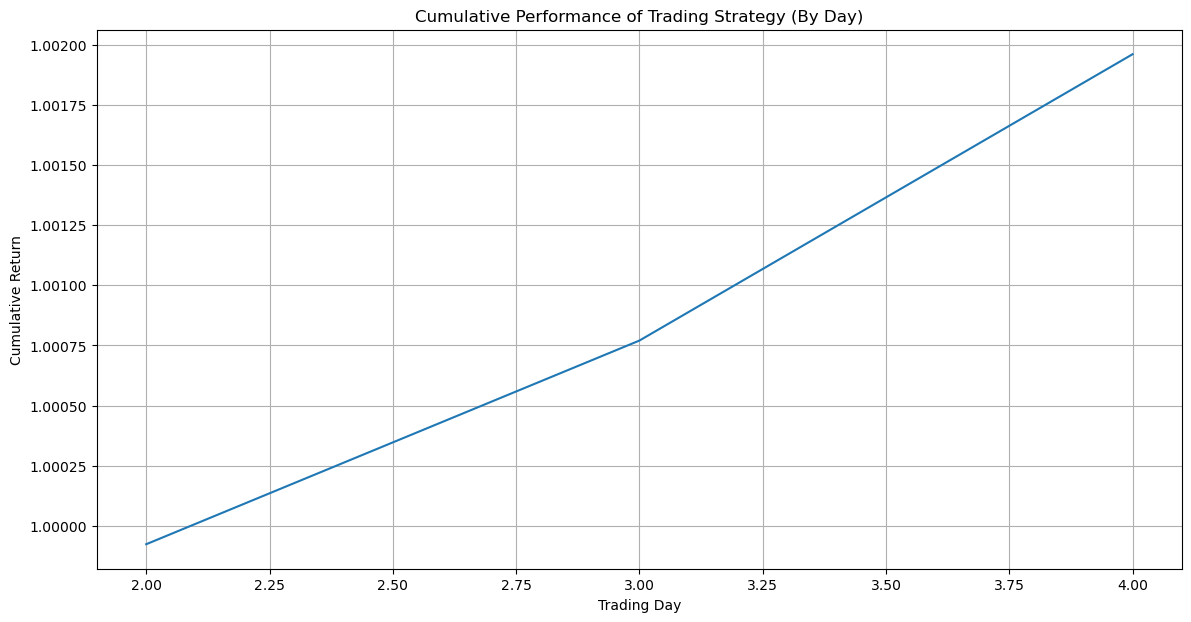

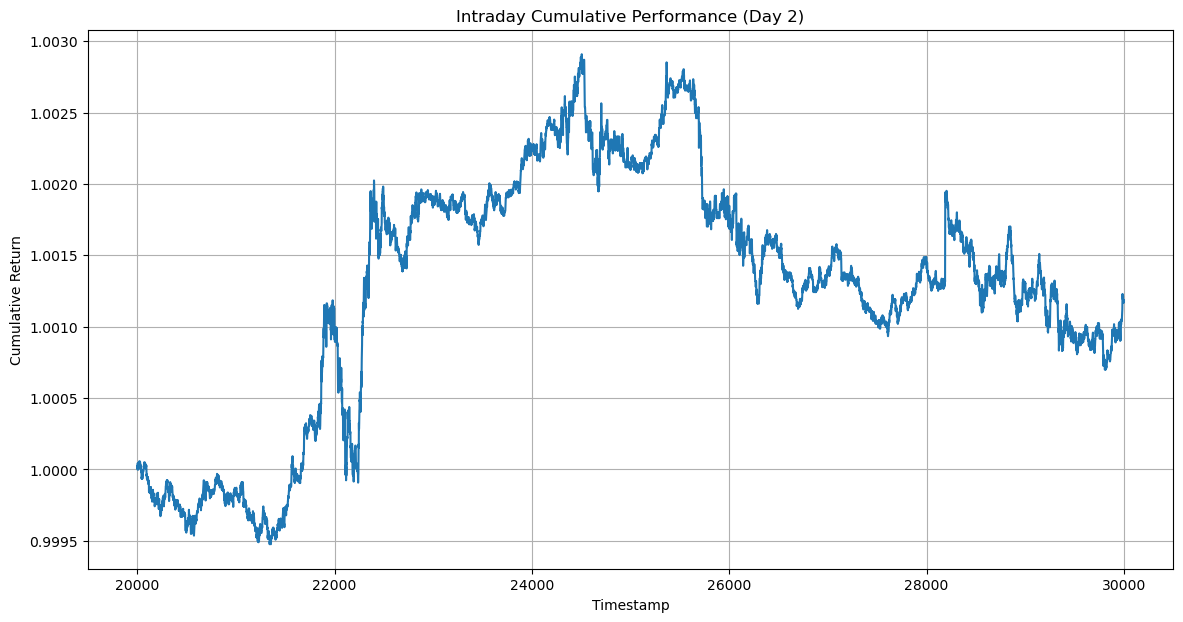

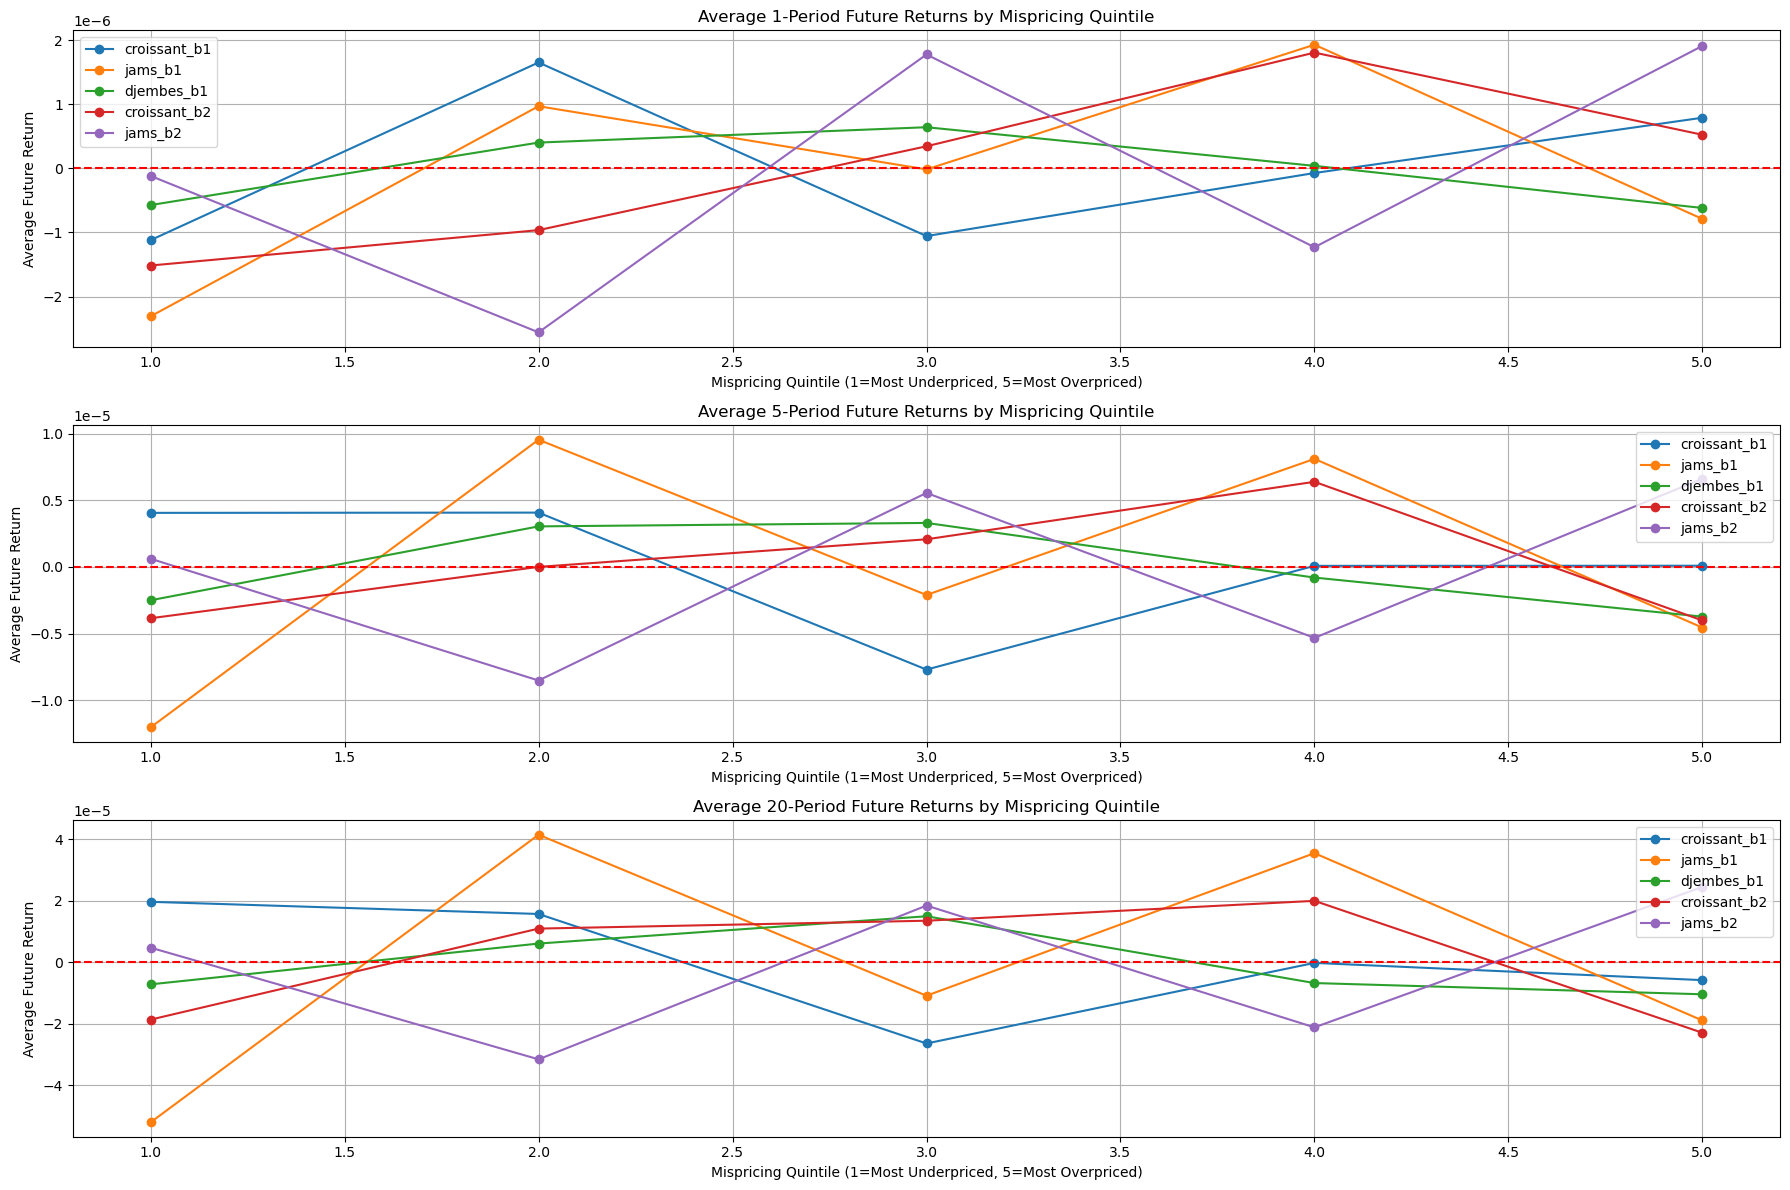

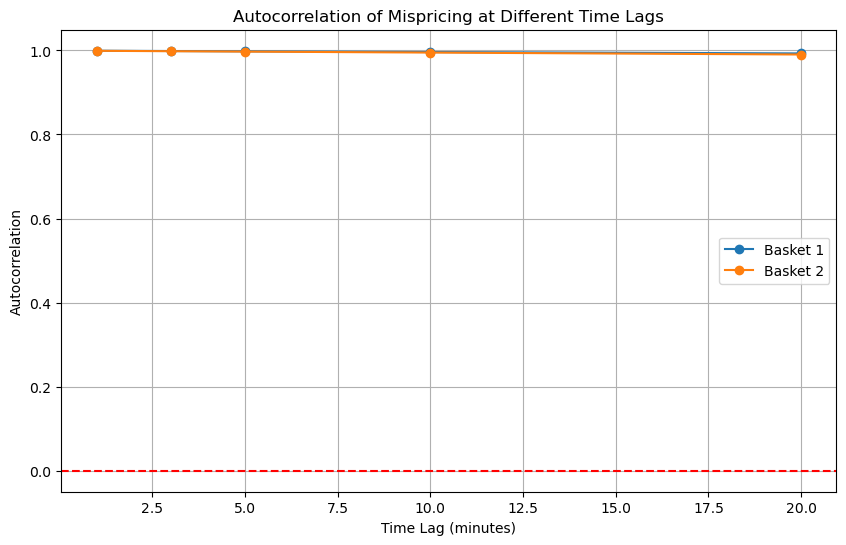

Mispricing persistence (autocorrelation):
basket  Basket 1  Basket 2
lag                       
1          0.999     0.999
3          0.999     0.998
5          0.998     0.997
10         0.996     0.995
20         0.993     0.990
Mean reversion analysis failed: name 'sm' is not defined

Latest Trading Signals:
       timestamp  basket1_rel_diff  basket2_rel_diff  basket1_signal  \
29980    2998000         -0.206647          0.956747               1   
29981    2998100         -0.215186          0.970035               1   
29982    2998200         -0.216890          0.976679               1   
29983    2998300         -0.206679          0.990165               1   
29984    2998400         -0.237420          0.960260               1   
29985    2998500         -0.235712          0.960260               1   
29986    2998600         -0.228888          0.953678               1   
29987    2998700         -0.225441          0.957001               1   
29988    2998800         -0.211788     

In [139]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Important context:
# - Timestamp differential is 100 (data points are 100 timestamps apart)
# - Full trading day is 1M timestamps (10,000 data points per day)

# 1. Calculate absolute difference (real - synthetic)
aligned_data["basket1_diff"] = aligned_data["real_basket_1"] - aligned_data["synthetic_basket_1"]
aligned_data["basket2_diff"] = aligned_data["real_basket_2"] - aligned_data["synthetic_basket_2"]

# 2. Calculate relative difference (as % of synthetic)
aligned_data["basket1_rel_diff"] = aligned_data["basket1_diff"] / aligned_data["synthetic_basket_1"] * 100
aligned_data["basket2_rel_diff"] = aligned_data["basket2_diff"] / aligned_data["synthetic_basket_2"] * 100

# 3. Create trading signals with a threshold (e.g., 0.5% difference)
threshold = 0.05  # Adjust this based on historical data analysis

# For basket 1
aligned_data["basket1_signal"] = np.where(
    aligned_data["basket1_rel_diff"] > threshold,  # Basket is overpriced
    -1,  # Short the basket, buy components (expecting mean reversion)
    np.where(
        aligned_data["basket1_rel_diff"] < -threshold,  # Basket is underpriced
        1,  # Buy the basket, sell components (expecting mean reversion)
        0   # No clear signal
    )
)

# For basket 2
aligned_data["basket2_signal"] = np.where(
    aligned_data["basket2_rel_diff"] > threshold,  # Basket is overpriced
    -1,  # Short the basket, buy components
    np.where(
        aligned_data["basket2_rel_diff"] < -threshold,  # Basket is underpriced
        1,  # Buy the basket, sell components
        0   # No clear signal
    )
)
# 4. Analyze if mispricing predicts future price movements of components

# Define timestamp-based prediction lags in minutes
# For a competition with timestamp differential of 100 and 1M timestamps per day
# Convert lag periods to appropriate timestep counts
time_lags = [100, 300, 500, 1000, 2000]  # Actual timesteps
display_lags = [1, 3, 5, 10, 20]  # For display purposes (in minutes)

# Calculate returns for various time horizons
for i, lag in enumerate(time_lags):
    display_lag = display_lags[i]
    
    # Calculate future returns with appropriate lag
    # We need to calculate future returns separately for each day
    aligned_data[f'croissant_return_{display_lag}'] = aligned_data.groupby('day')['bid_price_1_croissants'].transform(
        lambda x: x.shift(-lag//100) / x - 1
    )
    
    aligned_data[f'jams_return_{display_lag}'] = aligned_data.groupby('day')['bid_price_1_jams'].transform(
        lambda x: x.shift(-lag//100) / x - 1
    )
    
    aligned_data[f'djembes_return_{display_lag}'] = aligned_data.groupby('day')['bid_price_1_djembes'].transform(
        lambda x: x.shift(-lag//100) / x - 1
    )

# 5. Calculate correlation between current basket mispricing and future returns
correlation_results = pd.DataFrame(columns=['lag', 'component', 'correlation'])
row = 0

for lag in display_lags:
    components = ['croissant', 'jams', 'djembes']
    for component in components:
        if component == 'djembes':
            # Skip basket 2 for djembes as it's not in basket 2
            corr1 = aligned_data['basket1_rel_diff'].corr(aligned_data[f'{component}_return_{lag}'])
            correlation_results.loc[row] = [lag, f'{component}_basket1', corr1]
            row += 1
        else:
            corr1 = aligned_data['basket1_rel_diff'].corr(aligned_data[f'{component}_return_{lag}'])
            corr2 = aligned_data['basket2_rel_diff'].corr(aligned_data[f'{component}_return_{lag}'])
            correlation_results.loc[row] = [lag, f'{component}_basket1', corr1]
            row += 1
            correlation_results.loc[row] = [lag, f'{component}_basket2', corr2]
            row += 1

# 6. Implement a simple backtesting strategy
# Use the shortest lag period for the backtest
lag_period = display_lags[0]  # 1-minute return

# For croissants using basket1 signal
aligned_data['position_croissants_b1'] = aligned_data['basket1_signal'].shift(1)  # Take position based on previous signal
aligned_data['strategy_return_croissants_b1'] = aligned_data['position_croissants_b1'] * aligned_data[f'croissant_return_{lag_period}']

# For jams using basket1 signal
aligned_data['position_jams_b1'] = aligned_data['basket1_signal'].shift(1)
aligned_data['strategy_return_jams_b1'] = aligned_data['position_jams_b1'] * aligned_data[f'jams_return_{lag_period}']

# For djembes using basket1 signal (only for basket 1)
aligned_data['position_djembes_b1'] = aligned_data['basket1_signal'].shift(1)
aligned_data['strategy_return_djembes_b1'] = aligned_data['position_djembes_b1'] * aligned_data[f'djembes_return_{lag_period}']

# For croissants using basket2 signal
aligned_data['position_croissants_b2'] = aligned_data['basket2_signal'].shift(1)
aligned_data['strategy_return_croissants_b2'] = aligned_data['position_croissants_b2'] * aligned_data[f'croissant_return_{lag_period}']

# For jams using basket2 signal
aligned_data['position_jams_b2'] = aligned_data['basket2_signal'].shift(1)
aligned_data['strategy_return_jams_b2'] = aligned_data['position_jams_b2'] * aligned_data[f'jams_return_{lag_period}']

# 7. Calculate combined strategy performance
# Basket 1 strategy (equal weight)
aligned_data['basket1_strategy_return'] = (
    aligned_data['strategy_return_croissants_b1'] + 
    aligned_data['strategy_return_jams_b1'] + 
    aligned_data['strategy_return_djembes_b1']
) / 3

# Basket 2 strategy (equal weight)
aligned_data['basket2_strategy_return'] = (
    aligned_data['strategy_return_croissants_b2'] + 
    aligned_data['strategy_return_jams_b2']
) / 2

# Combined strategy (equal weight between basket strategies)
aligned_data['combined_return'] = (
    aligned_data['basket1_strategy_return'] + 
    aligned_data['basket2_strategy_return']
) / 2

# Calculate cumulative performance by day to prevent overnight jumps
aligned_data['cumulative_return'] = aligned_data.groupby('day')['combined_return'].transform(
    lambda x: (1 + x.fillna(0)).cumprod()
)

# 8. Function to analyze mispricing statistically
def analyze_mispricing():
    # Display distribution of mispricing
    fig, axes = plt.subplots(2, 1, figsize=(14, 10))
    
    # Histogram of mispricing
    axes[0].hist(aligned_data["basket1_rel_diff"].dropna(), bins=50, alpha=0.7, label='Basket 1')
    axes[0].hist(aligned_data["basket2_rel_diff"].dropna(), bins=50, alpha=0.7, label='Basket 2')
    axes[0].axvline(0, color='r', linestyle='--')
    axes[0].set_title("Distribution of Basket Pricing Differential")
    axes[0].set_xlabel("Relative Difference (%)")
    axes[0].set_ylabel("Frequency")
    axes[0].legend()
    
    # Time series of mispricing (for a sample day)
    sample_day = aligned_data['day'].unique()[0]  # Get the first day as sample
    day_data = aligned_data[aligned_data['day'] == sample_day]
    
    axes[1].plot(day_data["timestamp"], day_data["basket1_rel_diff"], label='Basket 1')
    axes[1].plot(day_data["timestamp"], day_data["basket2_rel_diff"], label='Basket 2')
    axes[1].axhline(0, color='r', linestyle='--')
    axes[1].axhline(threshold, color='g', linestyle='--')
    axes[1].axhline(-threshold, color='g', linestyle='--')
    axes[1].set_title(f"Basket Pricing Differential Over Time (Day {sample_day})")
    axes[1].set_xlabel("Timestamp")
    axes[1].set_ylabel("Relative Difference (%)")
    axes[1].legend()
    
    plt.tight_layout()
    plt.show()
    
    # Output correlation table
    print("Correlation between basket mispricing and future returns:")
    print(correlation_results.pivot(index='lag', columns='component', values='correlation').round(3))
    
    # Daily strategy performance metrics
    daily_returns = aligned_data.groupby('day')['combined_return'].sum()
    
    print("\nStrategy Performance Metrics:")
    sharpe_ratio = daily_returns.mean() / daily_returns.std() * np.sqrt(252)  # Annualized
    print(f"Annualized Sharpe Ratio: {sharpe_ratio:.2f}")
    print(f"Win Rate (daily): {(daily_returns > 0).mean():.2%}")
    print(f"Average Daily Return: {daily_returns.mean():.4%}")
    
    # Plot strategy performance by day
    plt.figure(figsize=(14, 7))
    daily_cumulative = (1 + daily_returns).cumprod()
    plt.plot(daily_cumulative.index, daily_cumulative.values)
    plt.title('Cumulative Performance of Trading Strategy (By Day)')
    plt.xlabel('Trading Day')
    plt.ylabel('Cumulative Return')
    plt.grid(True)
    plt.show()
    
    # Plot intraday performance
    plt.figure(figsize=(14, 7))
    sample_day_data = aligned_data[aligned_data['day'] == 4]['cumulative_return']
    plt.plot(sample_day_data.index, sample_day_data.values)
    plt.title(f'Intraday Cumulative Performance (Day {sample_day})')
    plt.xlabel('Timestamp')
    plt.ylabel('Cumulative Return')
    plt.grid(True)
    plt.show()

# 9. Function to analyze quintile performance
def analyze_quintile_performance():
    # Create bins based on mispricing level
    aligned_data['basket1_quintile'] = pd.qcut(aligned_data['basket1_rel_diff'].dropna(), 5, labels=False) + 1
    aligned_data['basket2_quintile'] = pd.qcut(aligned_data['basket2_rel_diff'].dropna(), 5, labels=False) + 1
    
    # Calculate average future returns by quintile for each basket
    quintile_results = pd.DataFrame()
    
    # Loop through different lag periods
    for lag in display_lags:
        # Basket 1 components
        for component in ['croissant', 'jams', 'djembes']:
            # Group by quintile and calculate average return
            quintile_data = aligned_data.groupby('basket1_quintile')[f'{component}_return_{lag}'].mean().reset_index()
            quintile_data['lag'] = lag
            quintile_data['component'] = f'{component}_b1'
            quintile_data.rename(columns={f'{component}_return_{lag}': 'avg_return'}, inplace=True)
            quintile_results = pd.concat([quintile_results, quintile_data])
        
        # Basket 2 components (excluding djembes)
        for component in ['croissant', 'jams']:
            quintile_data = aligned_data.groupby('basket2_quintile')[f'{component}_return_{lag}'].mean().reset_index()
            quintile_data['lag'] = lag
            quintile_data['component'] = f'{component}_b2'
            quintile_data.rename(columns={f'{component}_return_{lag}': 'avg_return'}, inplace=True)
            # Rename column to avoid confusion
            quintile_data.rename(columns={'basket2_quintile': 'basket1_quintile'}, inplace=True)
            quintile_results = pd.concat([quintile_results, quintile_data])
    
    # Plot quintile returns for each lag period
    plot_lags = [1, 5, 20]  # Selected lags to plot
    plt.figure(figsize=(18, 12))
    
    for i, lag in enumerate(plot_lags):
        plt.subplot(3, 1, i + 1)
        
        # Plot for each component
        for component in ['croissant_b1', 'jams_b1', 'djembes_b1', 'croissant_b2', 'jams_b2']:
            data = quintile_results[(quintile_results['lag'] == lag) & (quintile_results['component'] == component)]
            if not data.empty:
                plt.plot(data['basket1_quintile'], data['avg_return'], marker='o', label=component)
        
        plt.axhline(0, color='r', linestyle='--')
        plt.title(f'Average {lag}-Period Future Returns by Mispricing Quintile')
        plt.xlabel('Mispricing Quintile (1=Most Underpriced, 5=Most Overpriced)')
        plt.ylabel('Average Future Return')
        plt.legend()
        plt.grid(True)
    
    plt.tight_layout()
    plt.show()

# 10. Function to examine the correlation between current mispricing and future mispricing
def analyze_mispricing_persistence():
    # Calculate autocorrelation for different lags
    autocorr_results = pd.DataFrame(columns=['lag', 'basket', 'autocorrelation'])
    row = 0
    
    # Calculate autocorrelation for each basket with different lags
    for i, lag in enumerate(time_lags):
        display_lag = display_lags[i]
        # Create lagged versions of mispricing
        aligned_data[f'basket1_rel_diff_lag{display_lag}'] = aligned_data.groupby('day')['basket1_rel_diff'].shift(-lag//100)
        aligned_data[f'basket2_rel_diff_lag{display_lag}'] = aligned_data.groupby('day')['basket2_rel_diff'].shift(-lag//100)
        
        # Calculate autocorrelation
        autocorr1 = aligned_data['basket1_rel_diff'].corr(aligned_data[f'basket1_rel_diff_lag{display_lag}'])
        autocorr2 = aligned_data['basket2_rel_diff'].corr(aligned_data[f'basket2_rel_diff_lag{display_lag}'])
        
        autocorr_results.loc[row] = [display_lag, 'Basket 1', autocorr1]
        row += 1
        autocorr_results.loc[row] = [display_lag, 'Basket 2', autocorr2]
        row += 1
    
    # Plot autocorrelation results
    plt.figure(figsize=(10, 6))
    for basket in ['Basket 1', 'Basket 2']:
        data = autocorr_results[autocorr_results['basket'] == basket]
        plt.plot(data['lag'], data['autocorrelation'], marker='o', label=basket)
    
    plt.axhline(0, color='r', linestyle='--')
    plt.title('Autocorrelation of Mispricing at Different Time Lags')
    plt.xlabel('Time Lag (minutes)')
    plt.ylabel('Autocorrelation')
    plt.legend()
    plt.grid(True)
    plt.show()
    
    print("Mispricing persistence (autocorrelation):")
    print(autocorr_results.pivot(index='lag', columns='basket', values='autocorrelation').round(3))

# 11. Function to analyze mean-reversion speed
def analyze_mean_reversion():
    # Calculate half-life of mispricing for each basket
    
    # For basket 1
    # Create lagged mispricing
    aligned_data['basket1_diff_lag1'] = aligned_data.groupby('day')['basket1_rel_diff'].shift(1)
    # Calculate change in mispricing
    aligned_data['basket1_diff_change'] = aligned_data['basket1_rel_diff'] - aligned_data['basket1_diff_lag1']
    
    # Create OLS regression model for mean reversion speed
    valid_data = aligned_data.dropna(subset=['basket1_diff_change', 'basket1_diff_lag1'])
    X = valid_data['basket1_diff_lag1']
    X = sm.add_constant(X)
    y = valid_data['basket1_diff_change']
    
    model = sm.OLS(y, X).fit()
    
    # Calculate half-life for basket 1
    lambda_coefficient = model.params[1]
    half_life_b1 = -np.log(2) / lambda_coefficient if lambda_coefficient < 0 else np.nan
    
    # For basket 2 (similar process)
    aligned_data['basket2_diff_lag1'] = aligned_data.groupby('day')['basket2_rel_diff'].shift(1)
    aligned_data['basket2_diff_change'] = aligned_data['basket2_rel_diff'] - aligned_data['basket2_diff_lag1']
    
    valid_data = aligned_data.dropna(subset=['basket2_diff_change', 'basket2_diff_lag1'])
    X = valid_data['basket2_diff_lag1']
    X = sm.add_constant(X)
    y = valid_data['basket2_diff_change']
    
    model = sm.OLS(y, X).fit()
    
    # Calculate half-life for basket 2
    lambda_coefficient = model.params[1]
    half_life_b2 = -np.log(2) / lambda_coefficient if lambda_coefficient < 0 else np.nan
    
    print(f"Mean Reversion Half-Life:")
    print(f"Basket 1: {half_life_b1:.2f} timesteps ({half_life_b1*100:.0f} timestamps)")
    print(f"Basket 2: {half_life_b2:.2f} timesteps ({half_life_b2*100:.0f} timestamps)")

# 12. Main function to run all analyses
def main():
    # Import statsmodels for the mean reversion analysis
    import statsmodels.api as sm

    # Run all analysis functions
    analyze_mispricing()
    analyze_quintile_performance()
    analyze_mispricing_persistence()
    
    try:
        analyze_mean_reversion()
    except Exception as e:
        print(f"Mean reversion analysis failed: {e}")
    
    # Output trading signals for the most recent day
    latest_day = aligned_data['day'].max()
    latest_data = aligned_data[aligned_data['day'] == latest_day].tail(20)
    
    print("\nLatest Trading Signals:")
    print(latest_data[['timestamp', 'basket1_rel_diff', 'basket2_rel_diff', 
                      'basket1_signal', 'basket2_signal']].tail(20))
main()

In [129]:
aligned_data

,day,timestamp,bid_price_1_croissants,bid_price_1_jams,bid_price_1_djembes,synthetic_basket_1,synthetic_basket_2,real_basket_1,real_basket_2,basket1_diff,...,basket1_rel_diff_lag3,basket2_rel_diff_lag3,basket1_rel_diff_lag5,basket2_rel_diff_lag5,basket1_rel_diff_lag10,basket2_rel_diff_lag10,basket1_rel_diff_lag20,basket2_rel_diff_lag20,basket1_diff_lag1,basket1_diff_change
0,2,0,4265.0,6519.0,13419.0,58566.0,30098.0,58702.0,30094.0,136.0,...,0.249291,-0.016612,0.251012,0.003323,0.249257,0.003322,0.233856,-0.006642,NaN,NaN
1,2,100,4265.0,6519.0,13419.0,58566.0,30098.0,58709.0,30096.0,143.0,...,0.235607,-0.019932,0.245914,0.009969,0.244123,0.003322,0.242412,0.006643,0.232217,0.011952
2,2,200,4265.0,6519.0,13419.0,58566.0,30098.0,58711.0,30092.0,145.0,...,0.251012,0.003323,0.239047,-0.003322,0.247537,0.013286,0.233876,0.003321,0.244169,0.003415
3,2,300,4265.0,6519.0,13419.0,58566.0,30098.0,58712.0,30093.0,146.0,...,0.245914,0.009969,0.245876,0.006645,0.262897,0.019928,0.237290,0.000000,0.247584,0.001707
4,2,400,4266.0,6519.0,13419.0,58572.0,30102.0,58710.0,30096.0,138.0,...,0.239047,-0.003322,0.256121,0.006645,0.245818,-0.003321,0.230462,-0.013286,0.249291,-0.013684
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,4,2999500,4271.0,6506.0,13409.0,58553.0,30096.0,58428.0,30382.0,-125.0,...,-0.203224,0.943584,NaN,NaN,NaN,NaN,NaN,NaN,-0.199839,-0.013642
29996,4,2999600,4270.0,6507.0,13409.0,58550.0,30094.0,58430.0,30383.0,-120.0,...,-0.198121,0.957001,NaN,NaN,NaN,NaN,NaN,NaN,-0.213482,0.008529
29997,4,2999700,4270.0,6507.0,13409.0,58550.0,30094.0,58433.0,30382.0,-117.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.204953,0.005124
29998,4,2999800,4271.0,6507.0,13409.0,58556.0,30098.0,58437.0,30382.0,-119.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.199829,-0.003395
